In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Target is:  0


<Figure size 640x480 with 0 Axes>

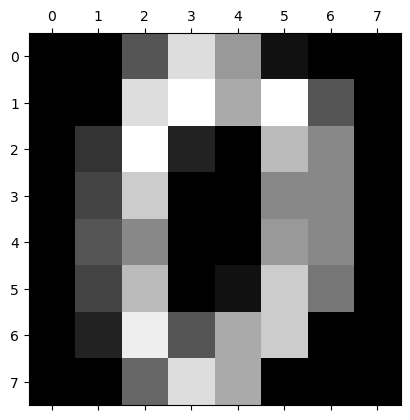

In [6]:
print("Target is: ", digits.target[0])
from matplotlib import pyplot as plt
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))
plt.show()

In [7]:
X = digits.data
y = digits.target

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 23)


Standardization on our dataset
so mean will be 0 and variance will be 1

Standardization is useful when you want make a symmetric data so model can work properly.

if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (for example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 9)


In [11]:
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, random_state = 42)
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred1 = rf1.predict(X_test)
y_pred1  #These all are predicted values

array([4, 6, 5, 8, 5, 4, 0, 5, 4, 5, 6, 5, 8, 7, 8, 3, 1, 9, 8, 8, 3, 4,
       2, 9, 4, 7, 8, 1, 9, 2, 9, 7, 8, 1, 5, 5, 3, 3, 4, 5, 4, 9, 0, 4,
       1, 3, 7, 6, 5, 5, 2, 7, 3, 3, 8, 6, 1, 3, 1, 9, 5, 5, 9, 8, 6, 5,
       6, 8, 1, 5, 4, 2, 5, 8, 9, 7, 5, 4, 6, 0, 8, 0, 5, 4, 6, 8, 2, 2,
       1, 4, 2, 5, 1, 5, 1, 1, 3, 8, 5, 9, 2, 9, 8, 8, 4, 4, 6, 1, 4, 1,
       8, 0, 3, 2, 4, 6, 3, 9, 6, 2, 9, 1, 3, 4, 1, 4, 0, 7, 4, 4, 2, 0,
       2, 1, 4, 8, 4, 0, 5, 0, 7, 6, 3, 5, 9, 4, 9, 4, 5, 7, 3, 7, 8, 3,
       3, 1, 5, 7, 7, 6, 2, 0, 0, 4, 1, 2, 1, 7, 5, 1, 2, 2, 2, 6, 5, 9,
       5, 0, 3, 2, 8, 9, 0, 7, 9, 2, 2, 8, 3, 1, 6, 7, 0, 1, 4, 7, 1, 1,
       0, 6, 1, 5, 4, 5, 3, 2, 6, 6, 5, 4, 8, 1, 9, 6, 1, 8, 0, 8, 8, 5,
       8, 3, 3, 8, 8, 4, 0, 6, 9, 6, 3, 8, 5, 9, 0, 6, 9, 7, 6, 6, 2, 0,
       9, 9, 5, 1, 1, 3, 9, 9, 9, 5, 7, 3, 5, 1, 3, 3, 9, 4, 1, 5, 9, 5,
       8, 9, 8, 7, 2, 5, 6, 0, 8, 9, 8, 6, 5, 0, 3, 9, 7, 0, 2, 0, 0, 4,
       7, 2, 1, 5, 2, 9, 2, 8, 2, 9, 0, 4, 2, 0, 3,

In [14]:
y_test  #These are your actual values

array([4, 6, 5, 8, 5, 4, 0, 5, 4, 5, 6, 5, 8, 7, 8, 3, 1, 8, 8, 8, 3, 4,
       2, 9, 4, 9, 8, 6, 9, 2, 9, 7, 8, 1, 5, 5, 3, 9, 4, 5, 4, 9, 0, 4,
       1, 3, 4, 6, 5, 5, 2, 7, 3, 3, 8, 6, 1, 3, 1, 9, 5, 5, 9, 1, 6, 5,
       6, 8, 1, 5, 4, 2, 5, 8, 9, 7, 5, 4, 6, 0, 1, 0, 5, 4, 6, 8, 2, 2,
       1, 4, 2, 5, 1, 5, 1, 8, 3, 8, 5, 9, 2, 9, 8, 8, 4, 4, 6, 1, 4, 1,
       8, 0, 3, 2, 4, 6, 3, 9, 6, 2, 9, 1, 3, 4, 1, 4, 0, 7, 4, 4, 2, 0,
       2, 1, 4, 8, 4, 0, 5, 0, 7, 6, 3, 5, 9, 4, 9, 4, 5, 7, 3, 7, 8, 3,
       3, 1, 5, 7, 7, 6, 2, 0, 0, 4, 1, 2, 1, 7, 5, 1, 2, 2, 2, 6, 5, 9,
       5, 9, 3, 2, 8, 9, 0, 7, 9, 2, 2, 8, 3, 1, 6, 7, 0, 1, 4, 7, 1, 1,
       0, 6, 1, 5, 4, 5, 3, 2, 6, 6, 5, 4, 8, 1, 9, 6, 1, 1, 0, 8, 8, 5,
       8, 3, 3, 8, 7, 4, 0, 6, 9, 1, 3, 8, 5, 9, 0, 6, 9, 7, 6, 6, 2, 0,
       9, 9, 5, 1, 1, 3, 9, 9, 9, 5, 7, 3, 5, 1, 3, 3, 9, 4, 1, 5, 9, 5,
       8, 9, 8, 7, 2, 5, 6, 0, 8, 8, 8, 6, 5, 0, 2, 9, 7, 0, 2, 0, 0, 4,
       7, 2, 1, 5, 2, 9, 2, 8, 2, 9, 0, 4, 2, 0, 9,

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, y_pred1)
cf = confusion_matrix(y_test, y_pred1)

In [16]:
acc

0.95

In [17]:
cf

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  1,  0,  1,  0,  3,  0],
       [ 0,  0, 37,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 34,  2],
       [ 1,  0,  0,  2,  0,  0,  0,  1,  1, 37]])

0    2
1    4
2    6
dtype: int64